In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.18.0


#### **Load Data**

In [32]:
fashion_mnist = keras.datasets.fashion_mnist

In [33]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### EDA

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
test_images.shape

(10000, 28, 28)

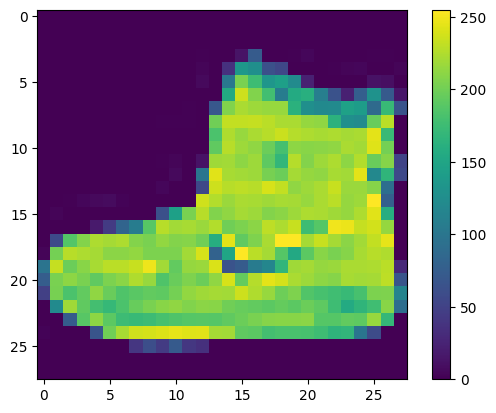

In [37]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
# Scaling 0, 1

train_images = train_images / 255.0

test_images = test_images / 255.0

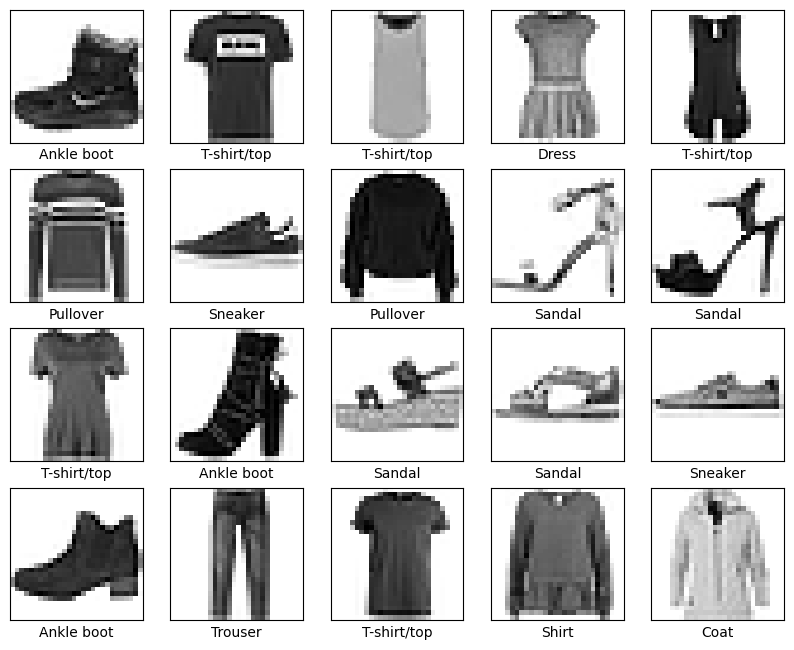

In [39]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **Build The Model**

In [40]:
from keras.layers import Dense, Flatten
from keras.activations import relu

In [51]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),  # 28x28 = 784
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
]) 
# We are using softmax beacuse classification 

In [43]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [44]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7786 - loss: 0.6340
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8643 - loss: 0.3789
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8762 - loss: 0.3398
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8854 - loss: 0.3120
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8926 - loss: 0.2876
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8956 - loss: 0.2799
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9007 - loss: 0.2665
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9048 - loss: 0.2547
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9076 - loss: 0.2457
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9101 - loss: 0.2416
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9145 - loss: 0.2263
Epoch 12/50
1875/1875 ━━━━━━━━

In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8871 - loss: 0.5392
Test accuracy: 0.8863999843597412


In [46]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
predictions[0]

array([1.2055766e-11, 1.3030951e-21, 3.1496001e-15, 2.4966287e-38,
       2.5734507e-18, 1.0356874e-09, 2.3000622e-24, 2.3248065e-06,
       4.7154150e-21, 9.9999762e-01], dtype=float32)

In [48]:
def plot_prediction_combined(i, predictions_array, true_label, img, class_names):
    predictions = predictions_array[i]
    true = true_label[i]
    image = img[i]
    predicted_label = np.argmax(predictions)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    
    # Görüntüyü göster
    ax1.imshow(image, cmap=plt.cm.binary)
    ax1.axis('off')
    title_color = 'green' if predicted_label == true else 'red'
    ax1.set_title(f"Tahmin: {class_names[predicted_label]}\nDoğru: {class_names[true]}", 
                  color=title_color, fontsize=14)
    
    # Olasılık bar grafiği
    bars = ax2.bar(range(len(predictions)), predictions, color="green")
    ax2.set_ylim([0, 1])
    ax2.set_xticks(range(len(predictions)))
    ax2.set_xlabel("Sinif")
    ax2.set_ylabel("Possibility")
    for idx, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}", 
                 ha='center', va='bottom', fontsize=10)
    bars[predicted_label].set_color('red')
    bars[true].set_color('green')
    
    plt.tight_layout()
    plt.show()


In [49]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="green")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

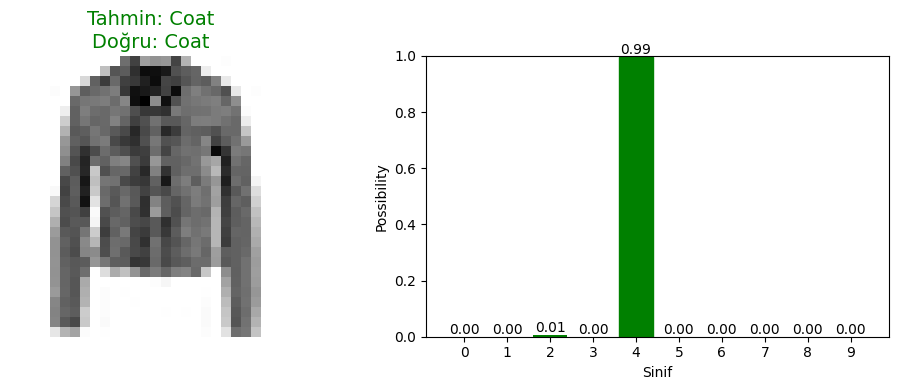

In [50]:
i = 10  # Burayı değiştirerek farklı örnekleri görüntüleyebiliriz
plot_prediction_combined(i, predictions, test_labels, test_images, class_names)